In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from scipy.special import boxcox1p

### Read Training Dataset

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

### Read Testing Dataset

In [5]:
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.shape

(1459, 80)

In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
num_cols = train._get_numeric_data().columns
display(num_cols)
print()
print("Count:", len(num_cols))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


Count: 38


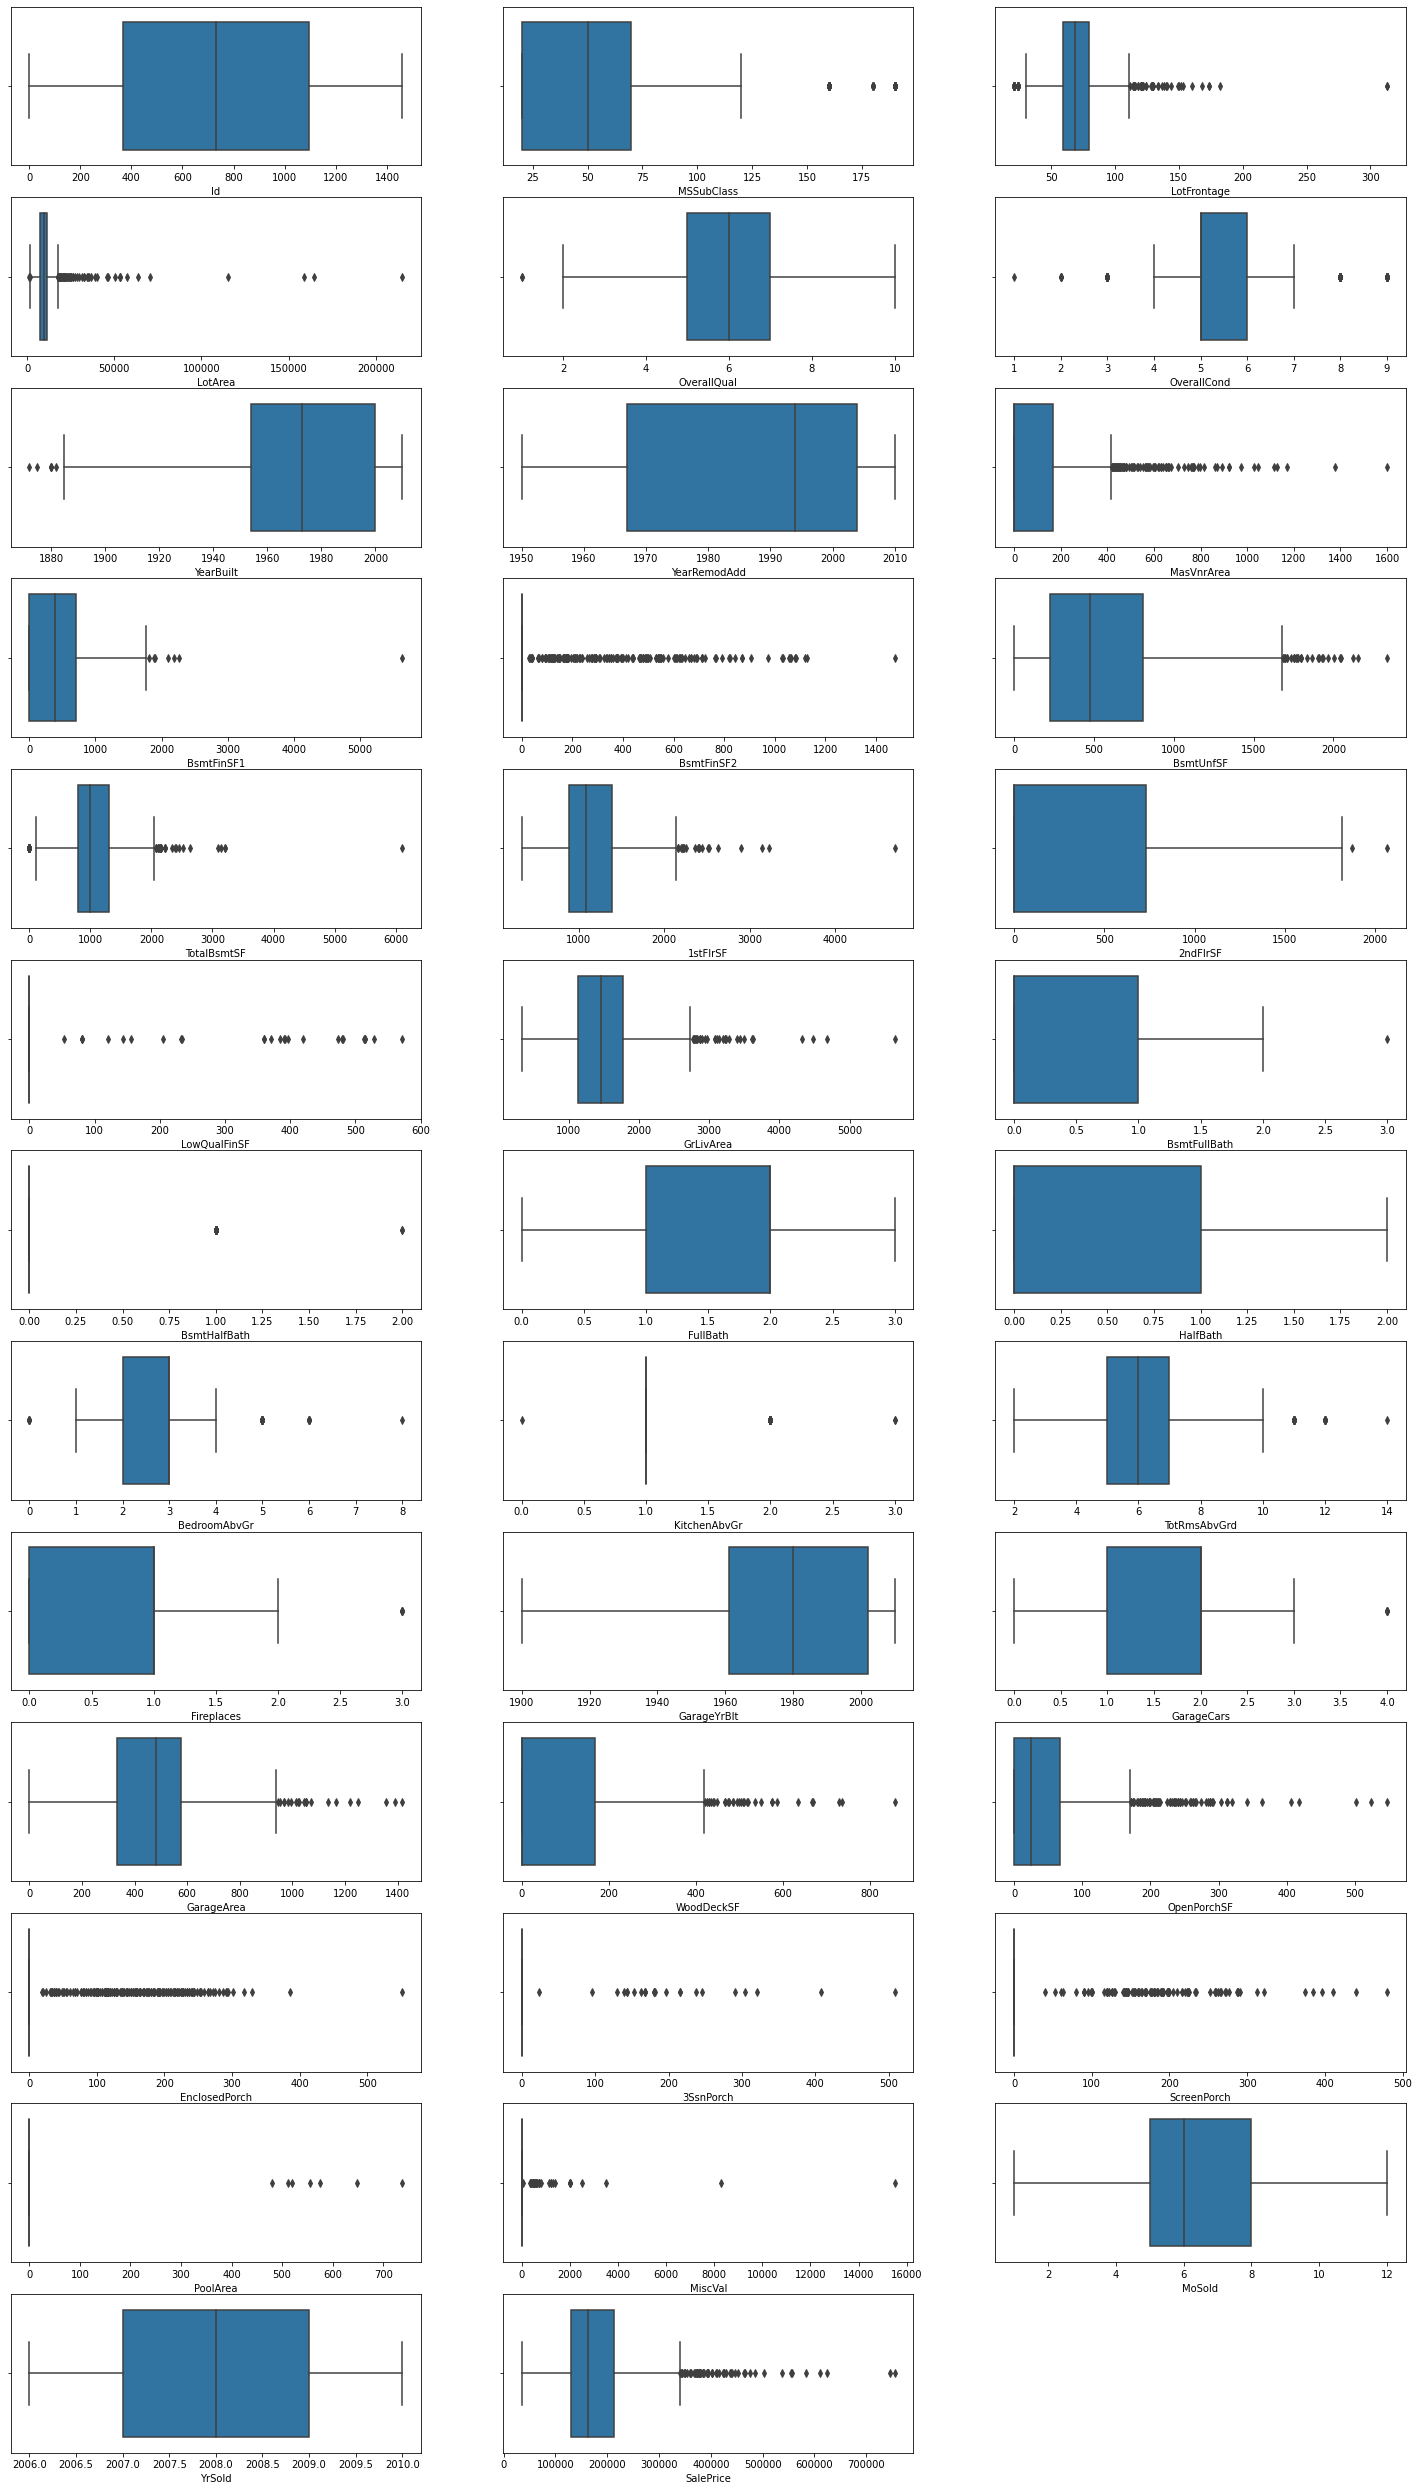

In [10]:
plt.figure(figsize = (25,45))
for i in enumerate(num_cols):
    plt.subplot(13, 3, i[0]+ 1)
    sns.boxplot(x = train[i[1]])
    plt.xlabel(i[1])

Many Attributes have Outliers

### Missing Data Handling - Training Dataset

<AxesSubplot:>

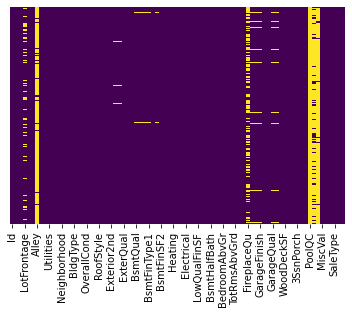

In [11]:
sns.heatmap(train.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

In [12]:
Null_train = train.isnull().sum()
Null_train[Null_train > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis = 1, inplace = True)

In [14]:
Null_train_data = train[['LotFrontage','MasVnrType', 'MasVnrArea', 'FireplaceQu',
                         'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                         'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
                         'GarageFinish', 'GarageQual', 'GarageCond']]

In [15]:
def view_null_data(data):
    return pd.DataFrame({"Data Type":data.dtypes, "Unique Count":data.apply(lambda x: x.nunique(),axis=0), 
                         "Null Count": data.isnull().sum() })

In [16]:
view_null_data(Null_train_data)

,Data Type,Unique Count,Null Count
LotFrontage,float64,110,259
MasVnrType,object,4,8
MasVnrArea,float64,327,8
FireplaceQu,object,5,690
BsmtQual,object,4,37
BsmtCond,object,4,37
BsmtExposure,object,4,38
BsmtFinType1,object,6,37
BsmtFinType2,object,6,38
Electrical,object,5,1


##### Observation: 'LotFrontage', 'MasVnrArea', 'GarageYrBlt' may be continuous data attributes

In [17]:
Null_train_data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


##### Observations:
1. For 'LotFrontage' and 'GarageYrBlt', we can use both mean and Median to replace null values
2. For 'MasVnrArea', we will use Mode to replace null values

In [18]:
train['LotFrontage'] = train['LotFrontage'].fillna(train.LotFrontage.mean())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train.GarageYrBlt.mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train.MasVnrArea.mode()[0])

### Missing Data Handling - Testing Dataset

<AxesSubplot:>

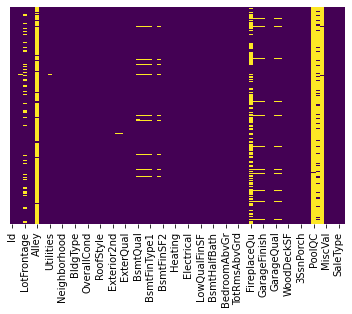

In [19]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [20]:
Null_test = test.isnull().sum()
Null_test[Null_test > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [21]:
Id = test['Id']
test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis = 1, inplace = True)

In [22]:
Null_test_data = test[['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st',
                       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual','FireplaceQu',
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
                       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
                       'GarageCars','GarageArea','GarageQual', 'GarageCond', 'SaleType']]

In [23]:
view_null_data(Null_test_data)

,Data Type,Unique Count,Null Count
MSZoning,object,5,4
LotFrontage,float64,115,227
Utilities,object,1,2
Exterior1st,object,13,1
Exterior2nd,object,15,1
MasVnrType,object,4,16
MasVnrArea,float64,303,15
BsmtQual,object,4,44
FireplaceQu,object,5,730
BsmtCond,object,4,45


##### Observations: 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath', 'GarageYrBlt', 'GarageArea' are continuous data attributes

In [24]:
Null_test_data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
                'GarageYrBlt', 'GarageArea']].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageArea
count,1232.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1457.000000,1457.000000,1381.000000,1458.000000
mean,68.580357,100.709141,439.203704,52.619342,554.294925,1046.117970,0.434454,0.065202,1977.721217,472.768861
std,22.376841,177.625900,455.268042,176.753926,437.260486,442.898624,0.530648,0.252468,26.431175,217.048611
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,219.250000,784.000000,0.000000,0.000000,1959.000000,318.000000
50%,67.000000,0.000000,350.500000,0.000000,460.000000,988.000000,0.000000,0.000000,1979.000000,480.000000
75%,80.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1.000000,0.000000,2002.000000,576.000000
max,200.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,3.000000,2.000000,2207.000000,1488.000000


##### Observations:
1. For {'LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageArea'}, we can use both mean and median to replace null values
2. For {'MasVnrArea', 'BsmtFinSF2', 'BsmtFullBath','BsmtHalfBath'}, we use mode to replace null values

In [25]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mode()[0])
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mode()[0])

### Filtering Highly Correlated Data

In [26]:
corr_matrix = train.corr().style.background_gradient()
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.246178,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087126,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [27]:
def filter_correlation(data, limit):
    col = set()
    corr_matrix = data.corr() 
    for i in range(len(corr_matrix)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > limit:
                col_name = corr_matrix.columns[i]
                col.add(col_name)
    return col

In [28]:
high_corr_col = filter_correlation(train, 0.7)
high_corr_col

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'SalePrice', 'TotRmsAbvGrd'}

**Observation: {'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'} have correlation greater than 0.7. So, we will drop them except 'SalePrice' and ''GarageYrBlt'**

In [29]:
train = train.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'], axis = 1)
test = test.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'], axis = 1)

### EDA

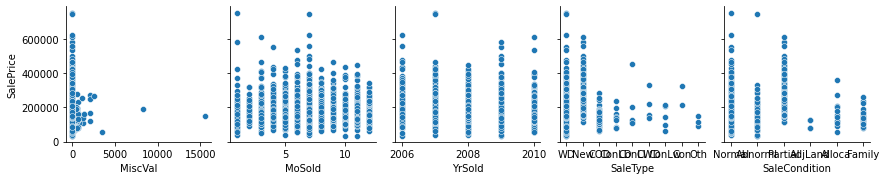

In [30]:
sns.pairplot(data = train, x_vars = ['MiscVal', 'MoSold','YrSold', 'SaleType', 'SaleCondition'], y_vars = 'SalePrice', kind = 'scatter')

In [31]:
train.drop(['MiscVal', 'MoSold','YrSold'], axis = 1, inplace = True)
test.drop(['MiscVal', 'MoSold','YrSold'], axis = 1, inplace = True)

**Observation: {'MiscVal', 'MoSold','YrSold'} don't affect 'SalePrice'. So, we drop them**

### Feature Transformation - 'SalePrice'

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

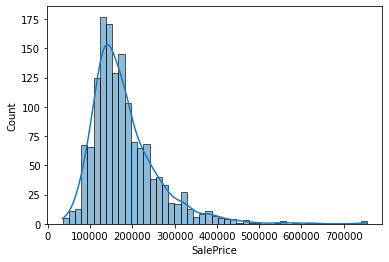

In [32]:
sns.histplot(x = 'SalePrice', data = train, kde = True)

**Observation: 'SalePrice' is Right-skewed**

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

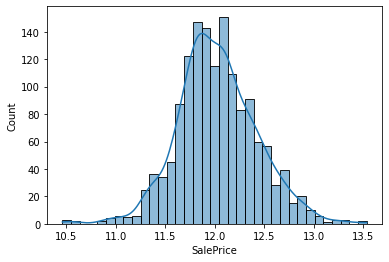

In [33]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(x = 'SalePrice', data = train, kde = True)

In [34]:
#cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
#      'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
 #      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
  #     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
   #    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
    #   'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
     #  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
#skewed_features = train[cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#print("Skewed features :\n")

#skewness = pd.DataFrame()
#skewness['Skew_value'] = skewed_features
#skewness

In [35]:
#features with skewness greater than 
#skewed_features = ['PoolArea', '3SsnPorch', 'LowQualFinSF', 'BsmtHalfBath',
#                   'ScreenPorch', 'BsmtFinSF2', 'KitchenAbvGr', 'EnclosedPorch', 
#                   'FullBath', 'OverallQual', 'LotFrontage', 'GarageCars', 
#                  'BsmtUnfSF', 'BedroomAbvGr', 'TotalBsmtSF']
#lamb_da = 0.25
#for feature in skewed_features:
#    train[feature] = boxcox1p(train[feature], lamb_da)
#    test[feature] = boxcox1p(train[feature], lamb_da)

### Model Building

In [36]:
X = train.drop(['SalePrice'], axis = 1)
col_to_use = list(X.columns)

y = train['SalePrice']

In [37]:
print(X.shape)
print(y.shape)

(1460, 69)
(1460,)


In [38]:
num_cols = [col for col in col_to_use if train[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in col_to_use if train[col].dtype == 'object']

In [39]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

In [40]:
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [42]:
num_processor = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', MinMaxScaler())
])

In [43]:
cat_processor = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse = False))
])

In [44]:
preprocessor = ColumnTransformer([
    ('num', num_processor, num_cols),
    ('cat', cat_processor, cat_cols)
])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [47]:
print(X_train.shape)
print(y_train.shape)

(1022, 69)
(1022,)


In [48]:
print(X_test.shape)
print(y_test.shape)

(438, 69)
(438,)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [50]:
model = LinearRegression()

In [51]:
model1 = Lasso()

In [52]:
model2 = Ridge()

In [53]:
model3 = DecisionTreeRegressor(max_leaf_nodes = 30, random_state = 42)

In [54]:
model4 = RandomForestRegressor(n_estimators = 500, random_state = 42)

In [55]:
model5 = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, random_state = 42)

In [56]:
model6 = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 165, random_state=42)

In [57]:
model7 = CatBoostRegressor(random_state=0,verbose=False, depth = 5, early_stopping_rounds=300, learning_rate= 0.1)

In [58]:
def build_model(model):
    clf = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    clf.fit(X_train, y_train)
    print(model)
    print("Train set score:", clf.score(X_train, y_train))
    print("Test set score:", clf.score(X_test, y_test))
    print("\n")
    print("Train set rmse:", mean_squared_error(y_train, clf.predict(X_train),squared=False))
    print("Test set rmse:", mean_squared_error(y_test, clf.predict(X_test),squared=False))
    print("\n")
    predictions = clf.predict(test)
    return predictions

In [59]:
predictions = build_model(model7)

Train set score: 0.9979700720050918
Test set score: 0.9155413912136321


Train set rmse: 0.017738270268023496
Test set rmse: 0.11969917003705631




In [60]:
predictions

array([11.70894048, 11.93644238, 12.1075843 , ..., 11.96631295,
       11.68110774, 12.34788775])

In [61]:
predictions = np.exp(predictions)

In [62]:
predictions

array([121654.51737576, 152732.3588037 , 181241.25082728, ...,
       157363.38220933, 118315.22527473, 230472.71251149])

In [63]:
output = pd.DataFrame({'Id': Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index = False)

In [64]:
sub = pd.read_csv('./submission.csv')
sub

,Id,SalePrice
0,1461,121654.517376
1,1462,152732.358804
2,1463,181241.250827
3,1464,185500.004493
4,1465,187062.339442
...,...,...
1454,2915,81331.252921
1455,2916,86395.025268
1456,2917,157363.382209
1457,2918,118315.225275
